<h2>Traffic Flow Optimization: QA and SA </h2>

<p>Uji coba penggunaan optimasi pada Traffic Flow menggunakan QUBO</p> 

Definisi problem:

<ul>
    <li>setiap kendaraan memiliki 3 pilihan rute (j=3)</li>
    <li>jumlah kendaraan 5 untuk 12 segment (i=4)</li>
</ul>


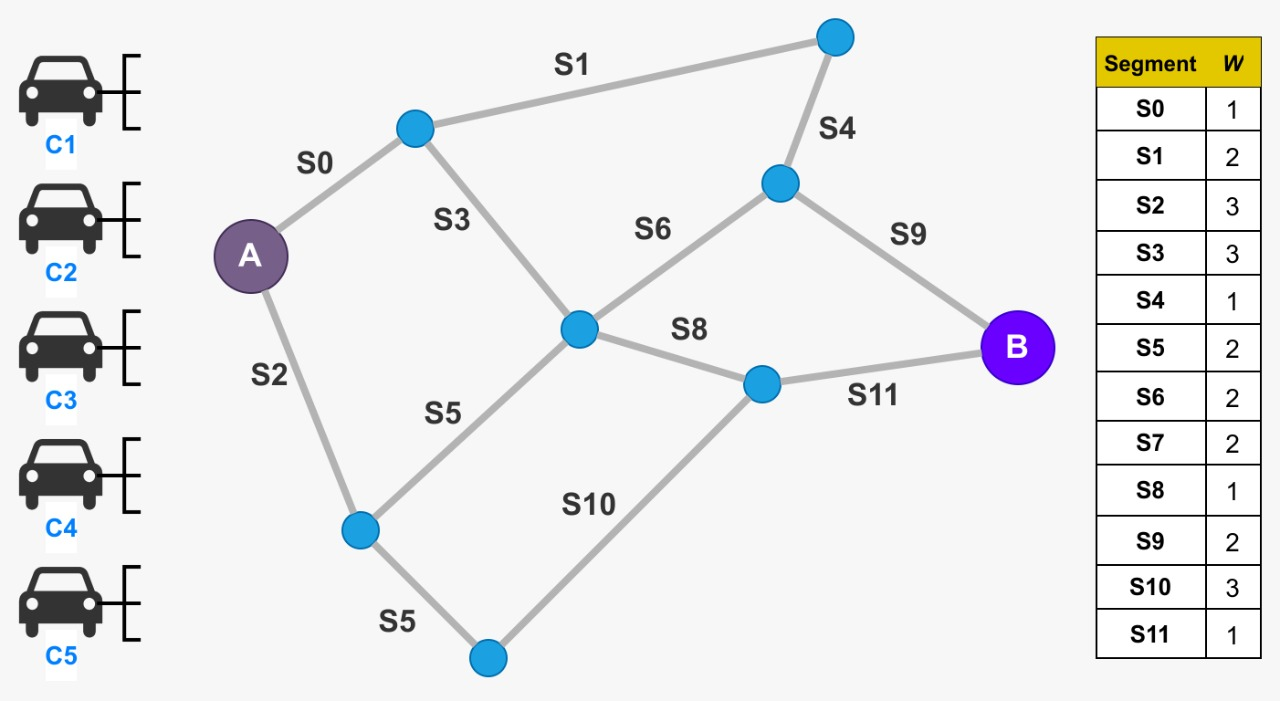

<h2>Kasus-5: Penambahan bobot segmen (w)</h2>
<p>Bobot pada segmen dapat merupakan ilustrasi untuk jarak (distance) atau prioritas jalur.</p>
<table class="tableizer-table">
<thead><tr class="tableizer-firstrow"><th>s0</th><th>s1</th><th>s2</th><th>s3</th><th>s4</th><th>s5</th><th>s6</th><th>s7</th><th>s8</th><th>s9</th><th>s10</th><th>s11</th></tr></thead><tbody>
 <tr><td>1</td><td>2</td><td>3</td><td>3</td><td>1</td><td>2</td><td>2</td><td>2</td><td>1</td><td>2</td><td>3</td><td>1</td></tr>
</tbody></table>


<h3>a. Kasus-5: Blueqat</h3>

In [2]:
import blueqat.wq as wq
import numpy as np

In [16]:
ac5 = wq.Opt()
ac5.qubo = [
    [144, 108, 72, 168, 108, 192, 72, 168, 0, 168, 72, 192, 108, 192, 168],
    [0, 324, 0, 252, 648, 0, 0, 252, 162, 252, 0, 0, 486, 0, 252],
    [0, 0, 144, 0, 0, 192, 288, 0, 108, 0, 288, 192, 0, 192, 0],
    [0, 0, 0, 196, 252, 0, 0, 392, 252, 392, 0, 0, 252, 224, 392],
    [0, 0, 0, 0, 324, 0, 0, 252, 162, 252, 0, 0, 648, 0, 252],
    [0, 0, 0, 0, 0, 256, 192, 0, 288, 0, 192, 512, 0, 512, 0],
    [0, 0, 0, 0, 0, 0, 144, 0, 108, 0, 288, 192, 0, 192, 0],
    [0, 0, 0, 0, 0, 0, 0, 196, 252, 392, 0, 0, 252, 0, 392],
    [0, 0, 0, 0, 0, 0, 0, 0, 324, 252, 108, 288, 162, 288, 252],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 196, 0, 0, 252, 0, 392],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 144, 192, 0, 192, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 256, 0, 512, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 288, 0, 224],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 256, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 224],
]
#print(a.qubo)

In [17]:
#Constraint - Penalty (K)
k = 648
kk = np.diag([-k for i in range(15)])

for i in range(0,15,3):
  kk[i][i+1] = 2*k
  kk[i][i+2] = 2*k
  kk[i+1][i+2] = 2*k

print(kk)

[[-648 1296 1296    0    0    0    0    0    0    0    0    0    0    0
     0]
 [   0 -648 1296    0    0    0    0    0    0    0    0    0    0    0
     0]
 [   0    0 -648    0    0    0    0    0    0    0    0    0    0    0
     0]
 [   0    0    0 -648 1296 1296    0    0    0    0    0    0    0    0
     0]
 [   0    0    0    0 -648 1296    0    0    0    0    0    0    0    0
     0]
 [   0    0    0    0    0 -648    0    0    0    0    0    0    0    0
     0]
 [   0    0    0    0    0    0 -648 1296 1296    0    0    0    0    0
     0]
 [   0    0    0    0    0    0    0 -648 1296    0    0    0    0    0
     0]
 [   0    0    0    0    0    0    0    0 -648    0    0    0    0    0
     0]
 [   0    0    0    0    0    0    0    0    0 -648 1296 1296    0    0
     0]
 [   0    0    0    0    0    0    0    0    0    0 -648 1296    0    0
     0]
 [   0    0    0    0    0    0    0    0    0    0    0 -648    0    0
     0]
 [   0    0    0    0    0    0    0    

In [18]:
ac5.qubo += kk
print(ac5.qubo)

[[-504 1404 1368  168  108  192   72  168    0  168   72  192  108  192
   168]
 [   0 -324 1296  252  648    0    0  252  162  252    0    0  486    0
   252]
 [   0    0 -504    0    0  192  288    0  108    0  288  192    0  192
     0]
 [   0    0    0 -452 1548 1296    0  392  252  392    0    0  252  224
   392]
 [   0    0    0    0 -324 1296    0  252  162  252    0    0  648    0
   252]
 [   0    0    0    0    0 -392  192    0  288    0  192  512    0  512
     0]
 [   0    0    0    0    0    0 -504 1296 1404    0  288  192    0  192
     0]
 [   0    0    0    0    0    0    0 -452 1548  392    0    0  252    0
   392]
 [   0    0    0    0    0    0    0    0 -324  252  108  288  162  288
   252]
 [   0    0    0    0    0    0    0    0    0 -452 1296 1296  252    0
   392]
 [   0    0    0    0    0    0    0    0    0    0 -504 1488    0  192
     0]
 [   0    0    0    0    0    0    0    0    0    0    0 -392    0  512
     0]
 [   0    0    0    0    0    0    0    

[1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1]
-1336.0


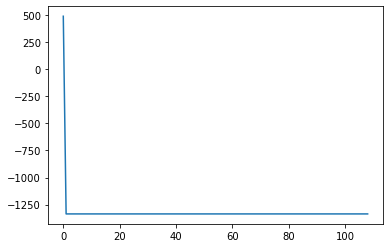

In [19]:
print(ac5.sa())
print(ac5.E[-1])
ac5.plot()

<h3>b. Kasus-5: Neal</h3>

In [20]:
import neal
samplerNeal = neal.SimulatedAnnealingSampler()

Qc5 = ac5.qubo
responseC5 = samplerNeal.sample_qubo(Qc5,num_sweeps=1000, num_reads=10)
print(list(responseC5.samples()))
list(responseC5.data_vectors['energy'])

[{0: 1, 1: 0, 2: 0, 3: 1, 4: 0, 5: 0, 6: 1, 7: 0, 8: 0, 9: 0, 10: 1, 11: 0, 12: 0, 13: 0, 14: 0}, {0: 1, 1: 0, 2: 0, 3: 1, 4: 0, 5: 0, 6: 1, 7: 0, 8: 0, 9: 0, 10: 1, 11: 0, 12: 0, 13: 0, 14: 0}, {0: 1, 1: 0, 2: 0, 3: 1, 4: 0, 5: 0, 6: 1, 7: 0, 8: 0, 9: 0, 10: 1, 11: 0, 12: 0, 13: 0, 14: 0}, {0: 1, 1: 0, 2: 0, 3: 1, 4: 0, 5: 0, 6: 1, 7: 0, 8: 0, 9: 0, 10: 1, 11: 0, 12: 0, 13: 0, 14: 0}, {0: 1, 1: 0, 2: 0, 3: 1, 4: 0, 5: 0, 6: 1, 7: 0, 8: 0, 9: 0, 10: 1, 11: 0, 12: 1, 13: 0, 14: 0}, {0: 1, 1: 0, 2: 0, 3: 1, 4: 0, 5: 0, 6: 1, 7: 0, 8: 0, 9: 0, 10: 1, 11: 0, 12: 0, 13: 0, 14: 0}, {0: 1, 1: 0, 2: 0, 3: 1, 4: 0, 5: 0, 6: 1, 7: 0, 8: 0, 9: 0, 10: 1, 11: 0, 12: 0, 13: 0, 14: 0}, {0: 1, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 1, 7: 0, 8: 0, 9: 0, 10: 1, 11: 0, 12: 0, 13: 0, 14: 1}, {0: 0, 1: 0, 2: 1, 3: 0, 4: 0, 5: 1, 6: 0, 7: 1, 8: 0, 9: 0, 10: 1, 11: 0, 12: 1, 13: 0, 14: 0}, {0: 0, 1: 0, 2: 1, 3: 0, 4: 1, 5: 0, 6: 0, 7: 1, 8: 0, 9: 0, 10: 1, 11: 0, 12: 0, 13: 1, 14: 0}]


[-1364.0,
 -1364.0,
 -1336.0,
 -1364.0,
 -1364.0,
 -1252.0,
 -1364.0,
 -1364.0,
 -1364.0,
 -1288.0]

In [21]:
print(responseC5)

   0  1  2  3  4  5  6  7  8  9 10 11 12 13 14  energy num_oc.
0  1  0  0  1  0  0  1  0  0  0  1  0  0  0  0 -1364.0       1
1  1  0  0  1  0  0  1  0  0  0  1  0  0  0  0 -1364.0       1
3  1  0  0  1  0  0  1  0  0  0  1  0  0  0  0 -1364.0       1
4  1  0  0  1  0  0  1  0  0  0  1  0  0  0  0 -1364.0       1
6  1  0  0  1  0  0  1  0  0  0  1  0  1  0  0 -1364.0       1
7  1  0  0  1  0  0  1  0  0  0  1  0  0  0  0 -1364.0       1
8  1  0  0  1  0  0  1  0  0  0  1  0  0  0  0 -1364.0       1
2  1  0  0  0  0  0  1  0  0  0  1  0  0  0  1 -1336.0       1
9  0  0  1  0  0  1  0  1  0  0  1  0  1  0  0 -1288.0       1
5  0  0  1  0  1  0  0  1  0  0  1  0  0  1  0 -1252.0       1
['BINARY', 10 rows, 10 samples, 15 variables]


<h3>c. Kasus-5: Dwave</h3>

In [7]:
#from dwave.system import DwaveSampler, EmbeddingComposite
from dwave.system.samplers import DWaveSampler
from dwave.system.composites import EmbeddingComposite

sampler = EmbeddingComposite(DWaveSampler(solver={'qpu': True}))

In [23]:
#sampler = EmbeddingComposite(DWaveSampler(solver={'qpu': True}))
#samplesetC = sampler.sample_qubo(Qc, num_reads=10, chain_strength=10)
samplesetC5 = sampler.sample_qubo(Qc5, num_reads=100)

print(samplesetC5)
print(samplesetC5.info["timing"])  

    0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 energy num_oc. chain_.
17  1  0  0  0  1  0  0  1  0  0  1  0  0  0  0 -1184.0       3 0.733333
26  1  0  0  0  1  0  1  0  0  0  0  0  0  0  1 -1156.0       1 0.733333
24  1  0  0  0  0  1  0  0  0  0  0  0  0  0  1 -960.0       1 0.733333
18  1  0  0  0  0  0  0  0  0  1  0  0  0  0  0 -788.0       1 0.733333
1   1  0  0  0  1  0  0  0  0  1  0  0  0  0  0 -752.0       4 0.666667
5   1  0  0  0  1  0  0  0  0  1  0  0  0  0  0 -752.0       2 0.666667
11  1  0  0  0  1  0  0  0  0  1  0  0  0  0  0 -752.0       1 0.733333
15  1  0  0  0  1  0  0  0  0  1  0  0  0  0  0 -752.0       2 0.666667
23  1  0  0  0  1  0  0  0  0  1  0  0  0  0  0 -752.0       1 0.733333
3   1  0  0  0  0  0  0  1  0  1  0  0  0  0  0 -680.0       3 0.733333
8   1  0  0  0  0  0  0  1  0  1  0  0  0  0  0 -680.0       1     0.8
10  1  0  0  0  0  0  0  1  0  1  0  0  0  0  0 -680.0       1 0.666667
13  1  0  0  0  1  0  0  1  0  1  0  0  0  1  0 -592.0       2 0

In [24]:
samplesetC5 = sampler.sample_qubo(Qc5, num_reads=500)
print(samplesetC5)
print(samplesetC5.info["timing"])  

     0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 energy num_oc. chain_b.
60   0  0  1  0  1  0  0  1  0  0  0  0  0  1  0 -1228.0       3      0.8
75   0  0  1  0  1  0  0  1  0  0  0  0  0  1  0 -1228.0       4      0.8
105  0  0  1  0  1  0  0  1  0  0  0  0  0  1  0 -1228.0       1 0.733333
171  0  0  1  0  1  0  0  1  0  0  0  0  0  1  0 -1228.0       1      0.8
115  0  0  1  0  0  0  0  1  0  1  0  0  0  1  0 -1216.0       1      0.8
177  0  0  1  0  0  0  0  1  0  1  0  0  0  1  0 -1216.0       1      0.8
182  0  0  1  0  0  0  0  1  0  1  0  0  0  1  0 -1216.0       1 0.866667
23   0  0  1  0  0  0  0  1  0  0  0  0  0  1  0 -1156.0      17 0.866667
34   0  0  1  0  0  0  0  1  0  0  0  0  0  1  0 -1156.0      12 0.866667
35   0  0  1  0  0  0  0  1  0  0  0  0  0  1  0 -1156.0       4      0.8
47   0  0  1  0  0  0  0  1  0  0  0  0  0  1  0 -1156.0       4      0.8
53   0  0  1  0  0  0  0  1  0  0  0  0  0  1  0 -1156.0       1 0.866667
69   0  0  1  0  0  0  0  1  0  0  0  0

In [25]:
samplesetC5 = sampler.sample_qubo(Qc5, num_reads=50)
print(samplesetC5)
print(samplesetC5.info["timing"])  

    0  1  2  3  4  5  6  7  8  9 10 11 12 13 14  energy num_oc. chain_b.
13  0  0  1  0  0  0  1  0  0  0  0  0  0  0  1 -1144.0       1 0.733333
14  0  0  0  0  0  0  1  0  0  0  0  0  0  0  1  -928.0       1 0.733333
16  0  0  1  0  0  0  0  0  0  0  0  0  0  0  1  -928.0       1 0.733333
18  0  0  0  0  0  0  1  0  0  0  0  0  0  0  1  -928.0       1 0.666667
12  0  0  0  0  0  1  0  0  0  0  0  0  0  0  1  -816.0       1 0.733333
7   0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  -424.0       2 0.733333
19  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  -424.0       1 0.733333
5   0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  -360.0       1 0.666667
15  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0     0.0       2 0.733333
3   0  0  1  0  0  0  1  0  0  0  0  0  1  0  1    16.0       3 0.666667
4   0  0  0  0  0  0  1  0  0  0  0  0  1  0  1   232.0       1 0.666667
9   0  0  1  0  0  0  0  0  0  0  0  0  1  0  1   232.0       1 0.666667
1   0  0  0  0  0  1  0  0  0  0  0  0  1  0  1   3

In [26]:
samplesetC5 = sampler.sample_qubo(Qc5, num_reads=10)
print(samplesetC5)
print(samplesetC5.info["timing"])  

   0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 energy num_oc. chain_b.
5  0  0  0  0  1  0  0  0  0  0  0  0  0  1  0 -716.0       1 0.866667
3  0  1  0  1  0  0  0  0  0  0  0  0  0  1  0 -692.0       1 0.866667
4  0  0  0  1  1  0  1  0  0  0  1  0  0  1  0  268.0       1      0.8
2  0  0  0  1  1  0  0  0  0  0  1  0  0  1  0  292.0       1      0.8
6  0  0  0  1  1  0  0  0  0  0  1  0  0  0  1  488.0       1      0.8
0  0  1  0  1  1  0  0  0  0  0  0  0  0  1  0 1180.0       4 0.866667
1  0  1  0  1  1  0  0  0  0  0  0  0  0  1  0 1180.0       1      0.8
['BINARY', 7 rows, 10 samples, 15 variables]
{'qpu_sampling_time': 2428, 'qpu_anneal_time_per_sample': 20, 'qpu_readout_time_per_sample': 202, 'qpu_access_time': 13233, 'qpu_access_overhead_time': 1674, 'qpu_programming_time': 10804, 'qpu_delay_time_per_sample': 21, 'total_post_processing_time': 142, 'post_processing_overhead_time': 142}


<h3>d. Kasus-5: Dwave (original)</h3>

In [3]:
ac5o = wq.Opt()
ac5o.qubo = [
[4,2,2,4,2,4,2,4,0,4,2,4,2,4,4],
[0,4,0,4,8,0,0,4,2,4,0,0,6,0,4],
[0,0,4,0,0,4,8,0,2,0,8,4,0,4,0],
[0,0,0,4,4,0,0,8,4,8,0,0,4,4,8],
[0,0,0,0,4,0,0,4,2,4,0,0,8,0,4],
[0,0,0,0,0,4,4,0,4,0,4,8,0,8,0],
[0,0,0,0,0,0,4,0,2,0,8,4,0,4,0],
[0,0,0,0,0,0,0,4,4,8,0,0,4,0,8],
[0,0,0,0,0,0,0,0,4,4,2,4,2,4,4],
[0,0,0,0,0,0,0,0,0,4,0,0,4,0,8],
[0,0,0,0,0,0,0,0,0,0,4,4,0,4,0],
[0,0,0,0,0,0,0,0,0,0,0,4,0,8,0],
[0,0,0,0,0,0,0,0,0,0,0,0,4,0,4],
[0,0,0,0,0,0,0,0,0,0,0,0,0,4,0],
[0,0,0,0,0,0,0,0,0,0,0,0,0,0,4],
]
#print(a.qubo)

In [4]:
#Constraint - Penalty (K)
k = 10
kk = np.diag([-k for i in range(15)])

for i in range(0,15,3):
  kk[i][i+1] = 2*k
  kk[i][i+2] = 2*k
  kk[i+1][i+2] = 2*k

print(kk)

[[-10  20  20   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0 -10  20   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0 -10   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0 -10  20  20   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0 -10  20   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0 -10   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0 -10  20  20   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0 -10  20   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 -10   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 -10  20  20   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 -10  20   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 -10   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 -10  20  20]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0 -10  20]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 -10]]


In [5]:
ac5o.qubo += kk
print(ac5o.qubo)

Qc = ac5o.qubo

[[-6 22 22  4  2  4  2  4  0  4  2  4  2  4  4]
 [ 0 -6 20  4  8  0  0  4  2  4  0  0  6  0  4]
 [ 0  0 -6  0  0  4  8  0  2  0  8  4  0  4  0]
 [ 0  0  0 -6 24 20  0  8  4  8  0  0  4  4  8]
 [ 0  0  0  0 -6 20  0  4  2  4  0  0  8  0  4]
 [ 0  0  0  0  0 -6  4  0  4  0  4  8  0  8  0]
 [ 0  0  0  0  0  0 -6 20 22  0  8  4  0  4  0]
 [ 0  0  0  0  0  0  0 -6 24  8  0  0  4  0  8]
 [ 0  0  0  0  0  0  0  0 -6  4  2  4  2  4  4]
 [ 0  0  0  0  0  0  0  0  0 -6 20 20  4  0  8]
 [ 0  0  0  0  0  0  0  0  0  0 -6 24  0  4  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 -6  0  8  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 -6 20 24]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 -6 20]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0 -6]]


In [8]:
#sampler = EmbeddingComposite(DWaveSampler(solver={'qpu': True}))
samplesetC = sampler.sample_qubo(Qc, num_reads=100)

print(samplesetC)
print(samplesetC.info["timing"])  

    0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 energy num_oc. chain_b.
44  0  1  0  0  0  1  0  1  0  0  0  1  0  1  0   -2.0       1 0.266667
37  0  1  0  0  0  1  1  1  0  0  0  1  0  1  0   24.0       2 0.333333
42  0  0  1  0  0  1  0  1  0  0  0  1  1  1  0   24.0       1 0.333333
46  0  1  0  0  1  1  1  1  0  0  0  1  0  0  0   36.0       1 0.266667
23  0  0  1  0  0  1  1  1  0  0  0  1  0  1  0   40.0       1      0.4
38  0  1  0  0  1  1  1  1  0  0  0  1  0  0  1   46.0       1      0.4
40  0  1  0  0  1  1  1  1  0  0  0  1  0  0  1   46.0       1 0.333333
17  0  0  1  1  0  1  0  0  0  0  0  1  1  1  0   48.0       1 0.333333
36  0  1  0  0  1  1  1  1  0  0  0  1  0  1  0   50.0       1      0.4
41  0  1  0  0  0  1  1  1  0  1  0  1  0  1  0   50.0       1 0.333333
33  0  0  1  1  1  0  0  0  1  0  0  1  1  1  0   52.0       1      0.4
35  0  0  1  0  0  1  1  1  0  1  0  1  0  0  1   54.0       1      0.4
2   0  0  1  1  0  0  1  0  1  0  0  1  1  1  0   56.0       1  

In [14]:
#sampler = EmbeddingComposite(DWaveSampler(solver={'qpu': True}))
samplesetC = sampler.sample_qubo(Qc, num_reads=500)
print(samplesetC)
print(samplesetC.info["timing"])  

    0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 energy num_oc. chain_b.
26  1  0  0  0  1  0  0  1  0  0  1  0  0  1  0  -10.0       1 0.333333
47  0  1  0  1  0  0  0  1  0  0  1  0  0  1  0   -6.0       1 0.333333
53  0  1  0  1  0  0  0  0  1  0  1  0  0  1  0   -6.0       1 0.333333
57  0  1  0  1  0  0  0  0  1  0  1  0  0  1  0   -6.0       1 0.266667
58  0  1  0  1  0  0  0  0  1  0  1  0  0  1  0   -6.0       1 0.333333
10  1  0  0  0  0  1  0  1  0  0  1  0  0  0  1   -4.0       4 0.266667
7   1  0  0  0  1  0  0  1  0  0  1  0  0  0  1   -2.0       2 0.333333
29  1  0  0  0  1  0  0  1  0  0  1  0  0  0  1   -2.0       1      0.4
33  1  0  0  0  1  0  0  1  0  0  1  0  0  0  1   -2.0       1 0.266667
54  1  0  0  1  0  0  0  0  1  0  1  0  0  1  0   -2.0       1 0.333333
23  1  0  0  1  0  0  0  1  0  0  1  0  0  1  0    0.0       4 0.333333
28  1  0  0  1  0  0  0  1  0  0  1  0  0  0  1    8.0       2      0.4
9   1  0  0  0  1  1  0  1  0  0  1  0  0  0  0   10.0       4 0

In [20]:
#sampler = EmbeddingComposite(DWaveSampler(solver={'qpu': True}))
samplesetC = sampler.sample_qubo(Qc, num_reads=50)

print(samplesetC)
print(samplesetC.info["timing"])  

    0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 energy num_oc. chain_b.
28  0  1  0  1  0  0  1  0  0  0  1  0  1  0  0   -8.0       1      0.2
23  1  0  0  1  0  0  0  0  0  0  1  0  0  1  0   -6.0       1 0.333333
29  0  1  0  0  1  0  1  0  0  0  1  0  0  1  0   -6.0       1      0.4
21  1  0  0  0  1  0  1  0  0  0  1  0  0  1  0   -4.0       3 0.266667
26  0  0  0  0  0  0  0  0  0  1  0  1  1  0  0    6.0       1 0.266667
2   1  0  0  0  0  0  0  0  0  1  0  1  1  0  0   10.0       1      0.4
9   1  0  0  0  0  0  1  0  0  1  0  1  1  0  0   10.0       1 0.333333
13  0  1  0  1  0  0  1  0  0  1  0  1  0  0  0   10.0       1 0.333333
15  0  1  0  0  0  0  0  0  0  1  0  1  1  0  0   10.0       3      0.4
24  1  0  0  0  1  0  1  0  0  1  0  1  0  0  0   10.0       1      0.4
30  1  0  0  0  1  0  1  1  0  0  1  0  0  0  0   12.0       1 0.333333
3   1  0  0  1  0  0  0  0  0  1  0  1  0  0  0   16.0       5      0.4
25  1  1  0  1  0  0  1  0  0  0  0  1  1  0  0   16.0       1 0

In [33]:
#sampler = EmbeddingComposite(DWaveSampler(solver={'qpu': True}))
samplesetC = sampler.sample_qubo(Qc, num_reads=10)
print(samplesetC)
print(samplesetC.info["timing"])  

   0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 energy num_oc. chain_b.
2  0  1  0  0  0  0  1  0  0  0  0  0  0  0  1  -14.0       1 0.733333
7  0  1  0  0  0  0  1  0  0  0  0  0  0  0  1  -14.0       1 0.666667
1  0  1  0  0  0  0  1  0  0  0  1  0  0  0  1  -12.0       1 0.666667
3  0  1  0  0  0  0  1  0  0  0  1  0  0  0  1  -12.0       1 0.733333
5  0  1  0  0  0  0  1  0  0  0  1  0  0  0  1  -12.0       1      0.6
9  0  1  0  0  0  0  1  0  0  0  1  0  0  0  1  -12.0       1 0.733333
8  1  0  0  0  0  0  1  0  0  0  0  0  0  0  0  -10.0       1 0.666667
0  0  1  0  0  0  0  0  0  0  0  1  1  0  0  1    4.0       1 0.666667
4  1  1  0  0  0  0  1  0  0  0  1  0  0  0  1   12.0       1 0.666667
6  1  1  0  0  0  0  0  0  0  0  1  1  0  0  1   30.0       1 0.666667
['BINARY', 10 rows, 10 samples, 15 variables]
{'qpu_sampling_time': 2432, 'qpu_anneal_time_per_sample': 20, 'qpu_readout_time_per_sample': 203, 'qpu_access_time': 13321, 'qpu_access_overhead_time': 1599, 'qpu_programmin